In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
file = 'car data (1).csv'

In [22]:
df =pd.read_csv(file)

In [23]:
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [24]:
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [25]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [26]:
print("\nStructure and data types of the dataset:")
print(df.info())


Structure and data types of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


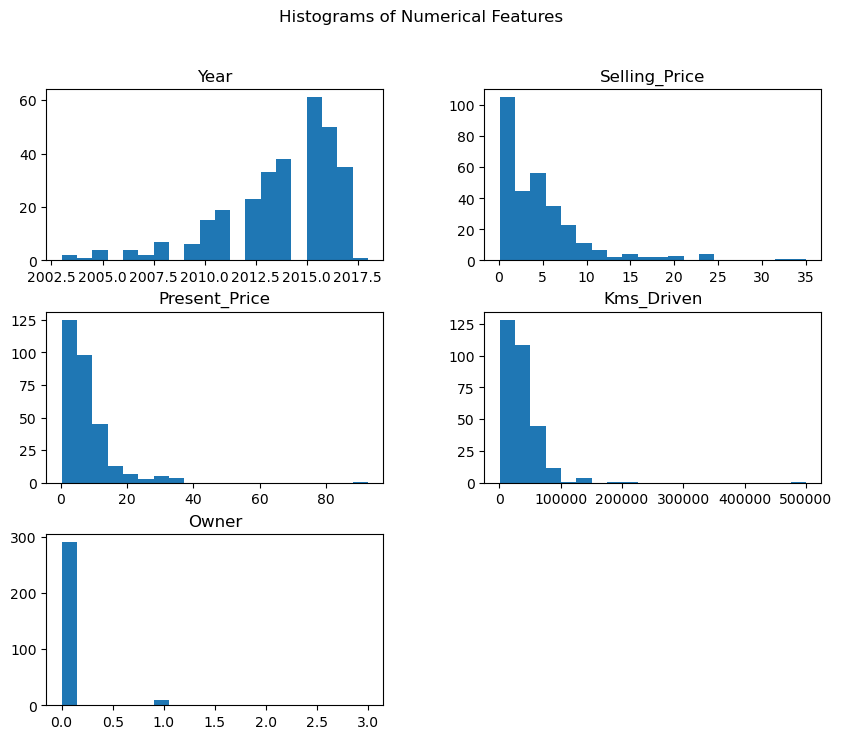

In [27]:
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(10, 8), bins=20, grid=False)
plt.suptitle("Histograms of Numerical Features")
plt.show()

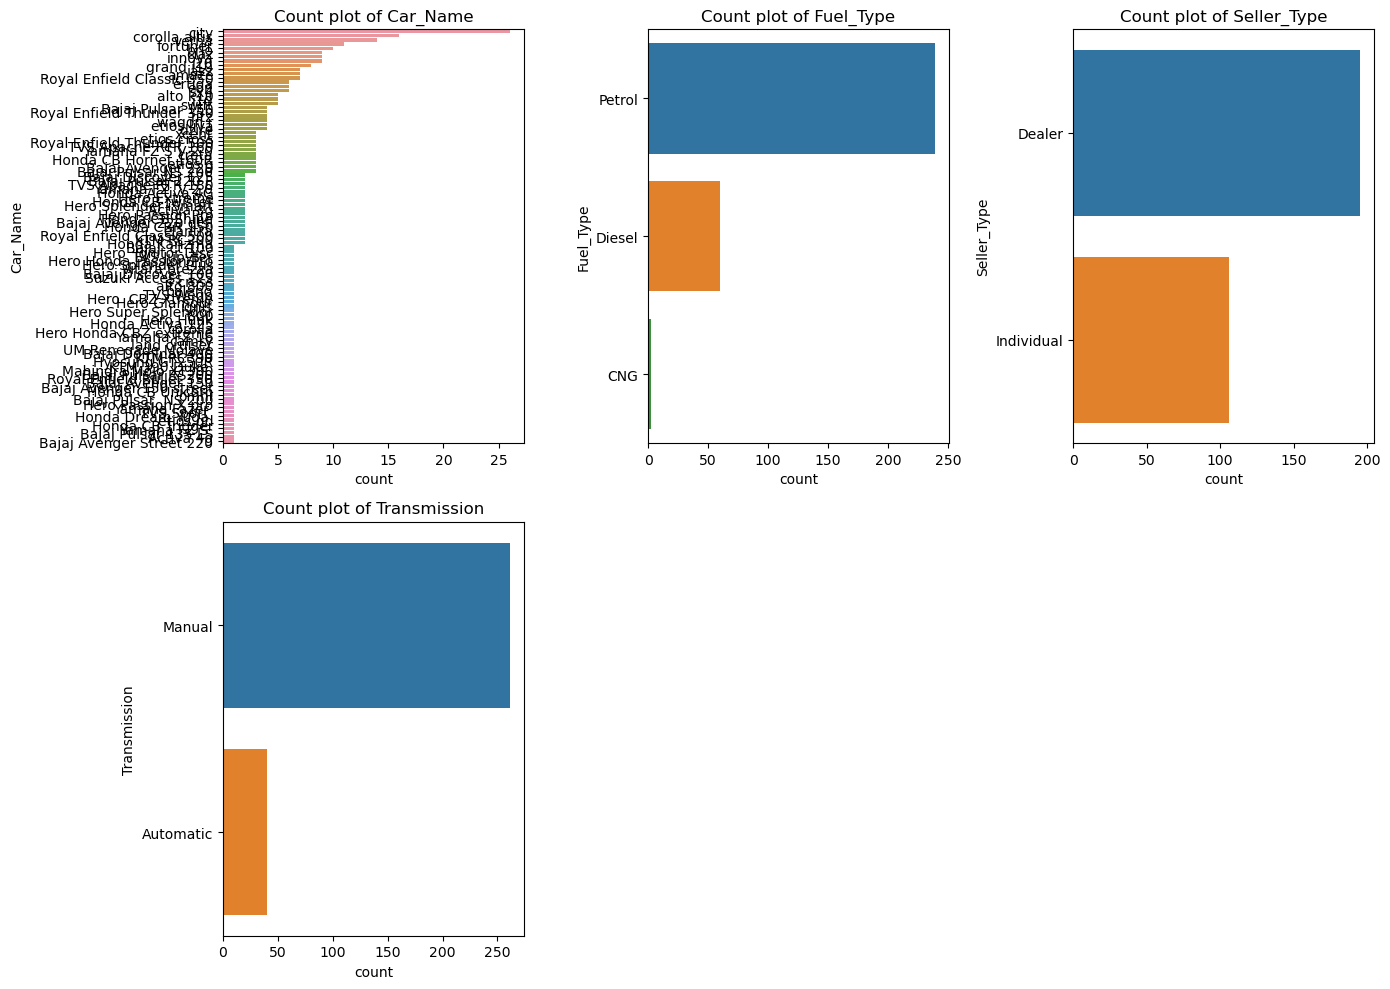

In [28]:
categorical_features = df.select_dtypes(include=[object]).columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Count plot of {column}')
plt.tight_layout()
plt.show()


In [31]:
df.dtypes

# Display unique values in categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f'{column}: {df[column].unique()}')

Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

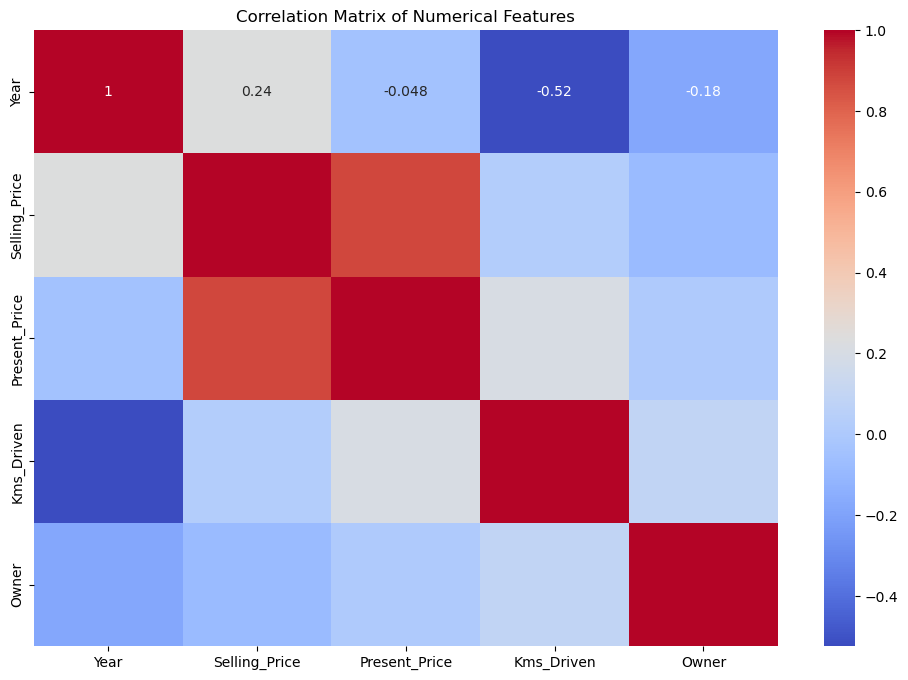

In [33]:
numerical_features = df.select_dtypes(include=[np.number]).columns

# Correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

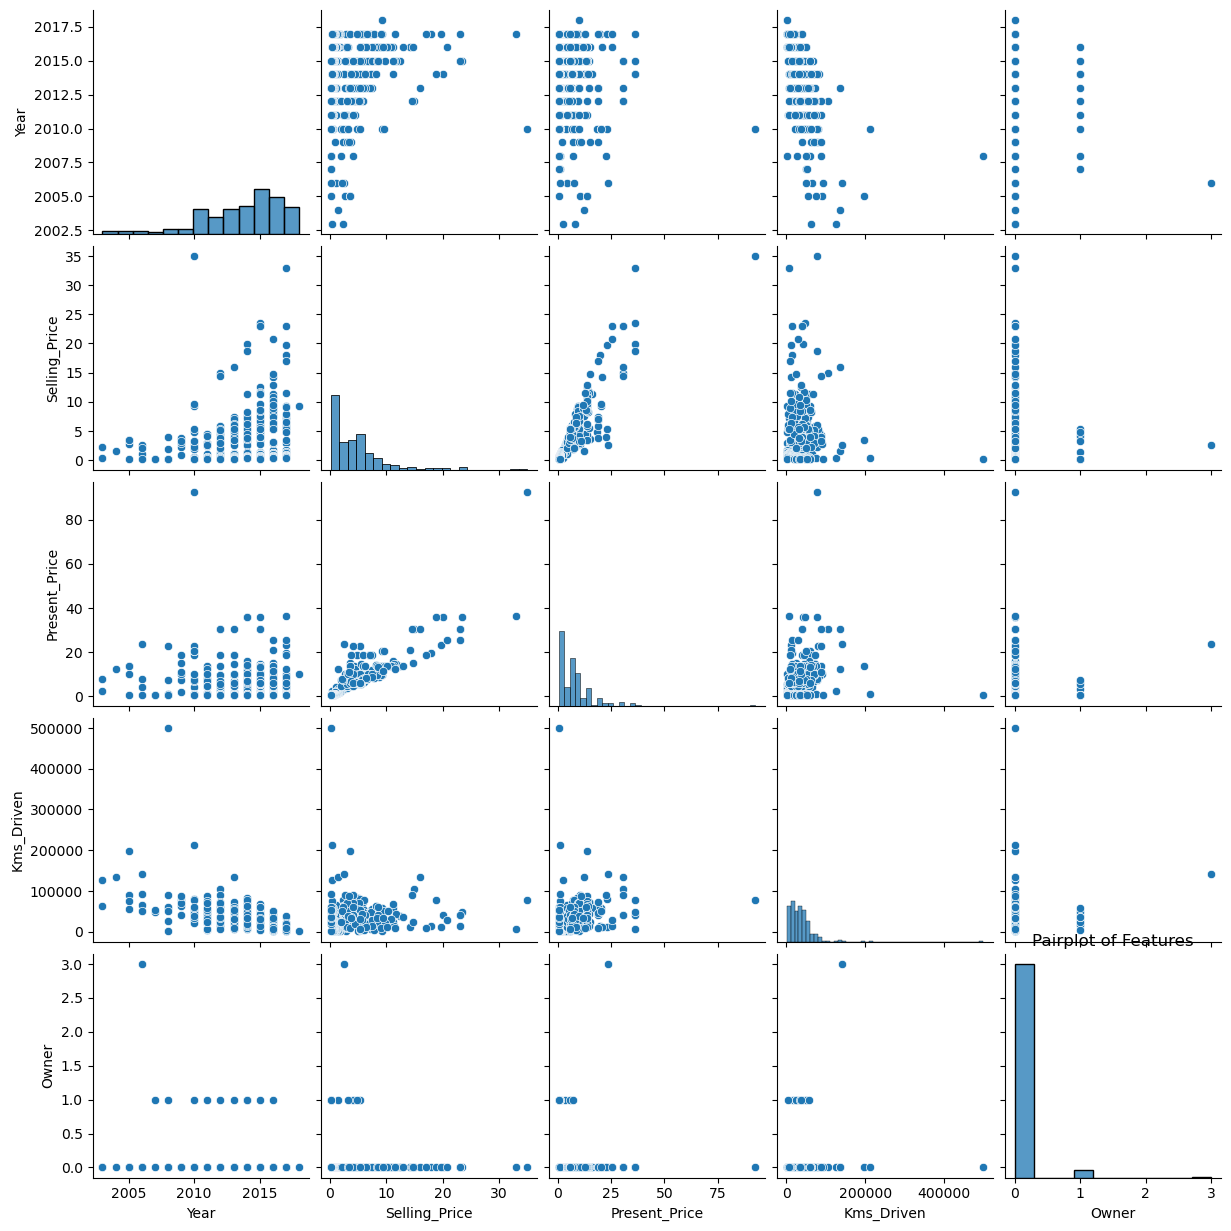

In [34]:
sns.pairplot(df)
plt.title("Pairplot of Features")
plt.show()

In [36]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [38]:
X = df_encoded.drop(columns=['Selling_Price'])  # Assuming 'selling_price' is the column to be predicted
y = df_encoded['Selling_Price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.0349434490302314
Mean Squared Error: 9.225663641180786
Root Mean Squared Error: 3.0373777574053555
R-squared: 0.5995038184051886


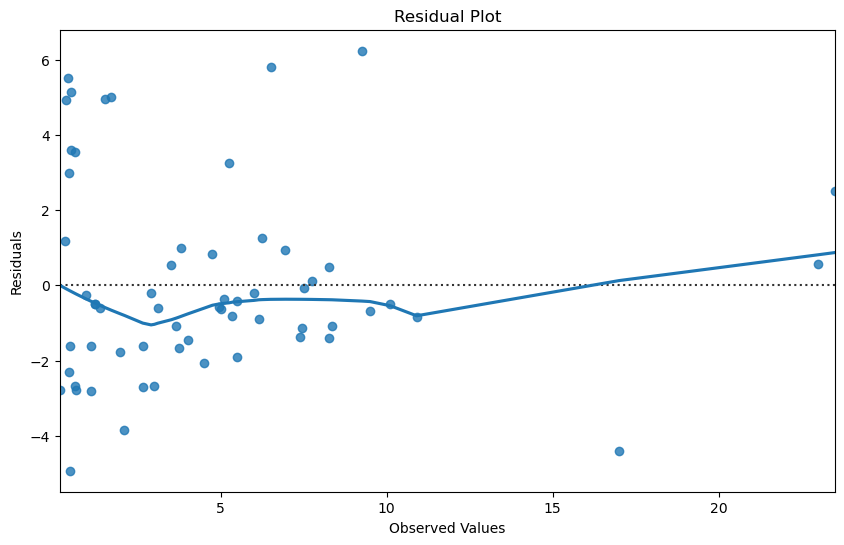

In [43]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

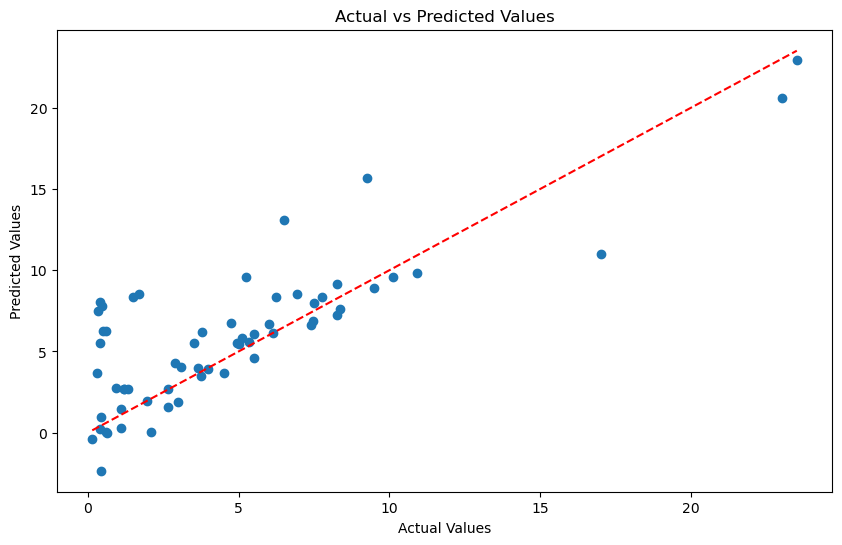

In [44]:
# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


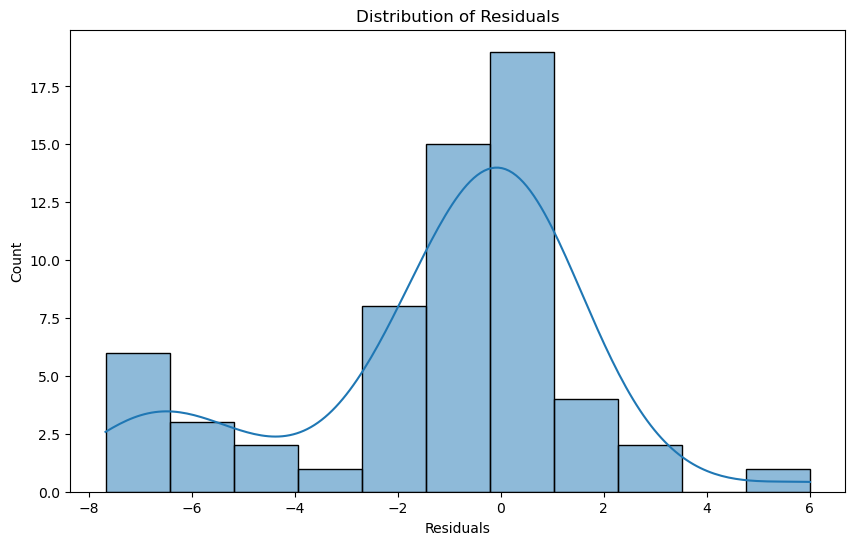

In [45]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [46]:
from sklearn.linear_model import Ridge

# Building and Training the Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Root Mean Squared Error: {ridge_rmse}")
print(f"R-squared: {ridge_r2}")


Ridge Regression:
Mean Absolute Error: 1.0785357544557437
Mean Squared Error: 2.523044677428637
Root Mean Squared Error: 1.5884094804012714
R-squared: 0.8904718621224357


In [47]:
from sklearn.linear_model import Lasso

# Building and Training the Lasso Regression Model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Root Mean Squared Error: {lasso_rmse}")
print(f"R-squared: {lasso_r2}")



Lasso Regression:
Mean Absolute Error: 1.4714288636691442
Mean Squared Error: 4.640489796314795
Root Mean Squared Error: 2.1541796109690563
R-squared: 0.7985512461284692


In [48]:
from sklearn.linear_model import ElasticNet

# Building and Training the ElasticNet Regression Model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Evaluate the model
elasticnet_mae = mean_absolute_error(y_test, y_pred_elasticnet)
elasticnet_mse = mean_squared_error(y_test, y_pred_elasticnet)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_r2 = r2_score(y_test, y_pred_elasticnet)

print("\nElasticNet Regression:")
print(f"Mean Absolute Error: {elasticnet_mae}")
print(f"Mean Squared Error: {elasticnet_mse}")
print(f"Root Mean Squared Error: {elasticnet_rmse}")
print(f"R-squared: {elasticnet_r2}")



ElasticNet Regression:
Mean Absolute Error: 1.4234287536004062
Mean Squared Error: 4.404693095422503
Root Mean Squared Error: 2.0987360709299545
R-squared: 0.8087874396439668


In [50]:
# Print all the results together for comparison
print("\nComparison of Regression Models:")
print(f"Multiple Linear Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")
print(f"Ridge Regression - MAE: {ridge_mae}, MSE: {ridge_mse}, RMSE: {ridge_rmse}, R-squared: {ridge_r2}")
print(f"Lasso Regression - MAE: {lasso_mae}, MSE: {lasso_mse}, RMSE: {lasso_rmse}, R-squared: {lasso_r2}")
print(f"ElasticNet Regression - MAE: {elasticnet_mae}, MSE: {elasticnet_mse}, RMSE: {elasticnet_rmse}, R-squared: {elasticnet_r2}")



Comparison of Regression Models:
Multiple Linear Regression - MAE: 2.0349434490302314, MSE: 9.225663641180786, RMSE: 3.0373777574053555, R-squared: 0.5995038184051886
Ridge Regression - MAE: 1.0785357544557437, MSE: 2.523044677428637, RMSE: 1.5884094804012714, R-squared: 0.8904718621224357
Lasso Regression - MAE: 1.4714288636691442, MSE: 4.640489796314795, RMSE: 2.1541796109690563, R-squared: 0.7985512461284692
ElasticNet Regression - MAE: 1.4234287536004062, MSE: 4.404693095422503, RMSE: 2.0987360709299545, R-squared: 0.8087874396439668



Feature Importance for Linear Regression:
                       Feature    Importance
91       Car_Name_land cruiser  2.588090e+01
70              Car_Name_camry  1.364231e+01
74      Car_Name_corolla altis  8.785456e+00
82           Car_Name_etios gd  7.854614e+00
65           Car_Name_alto 800  7.848704e+00
..                         ...           ...
94            Car_Name_s cross  4.756529e-12
37   Car_Name_Honda CB Trigger  3.913092e-12
64      Car_Name_Yamaha Fazer   2.896239e-12
41  Car_Name_Honda Dream Yuga   1.816325e-12
73            Car_Name_corolla  1.515982e-12

[105 rows x 2 columns]


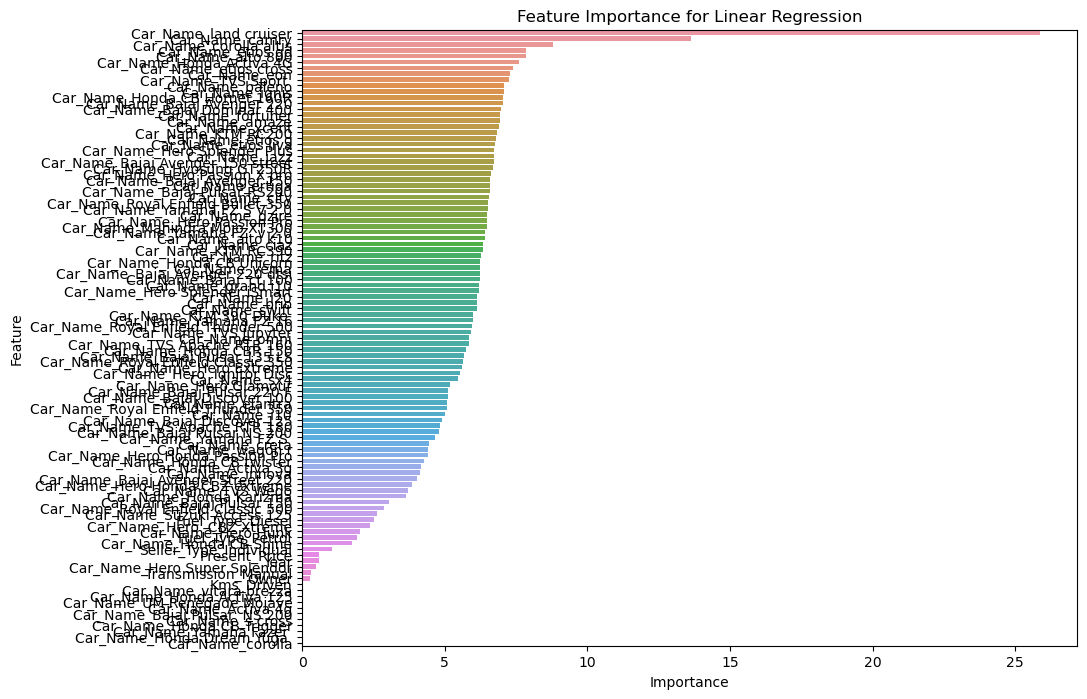

In [52]:
import numpy as np

# Feature importance for Linear Regression
lr_feature_importance = np.abs(model.coef_)
lr_feature_names = X.columns

# Create a DataFrame for better visualization
lr_feature_importance_df = pd.DataFrame({
    'Feature': lr_feature_names,
    'Importance': lr_feature_importance
})

# Sort the DataFrame by importance
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Linear Regression:")
print(lr_feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lr_feature_importance_df)
plt.title('Feature Importance for Linear Regression')
plt.show()



Feature Importance for Ridge Regression:
                          Feature  Importance
89                Car_Name_innova    2.982222
91          Car_Name_land cruiser    2.418316
84              Car_Name_fortuner    2.360537
75                 Car_Name_creta    2.315922
34       Car_Name_Honda Activa 4G    1.850071
..                            ...         ...
15  Car_Name_Bajaj Pulsar  NS 200    0.000000
98         Car_Name_vitara brezza    0.000000
73               Car_Name_corolla    0.000000
37      Car_Name_Honda CB Trigger    0.000000
33      Car_Name_Honda Activa 125    0.000000

[105 rows x 2 columns]


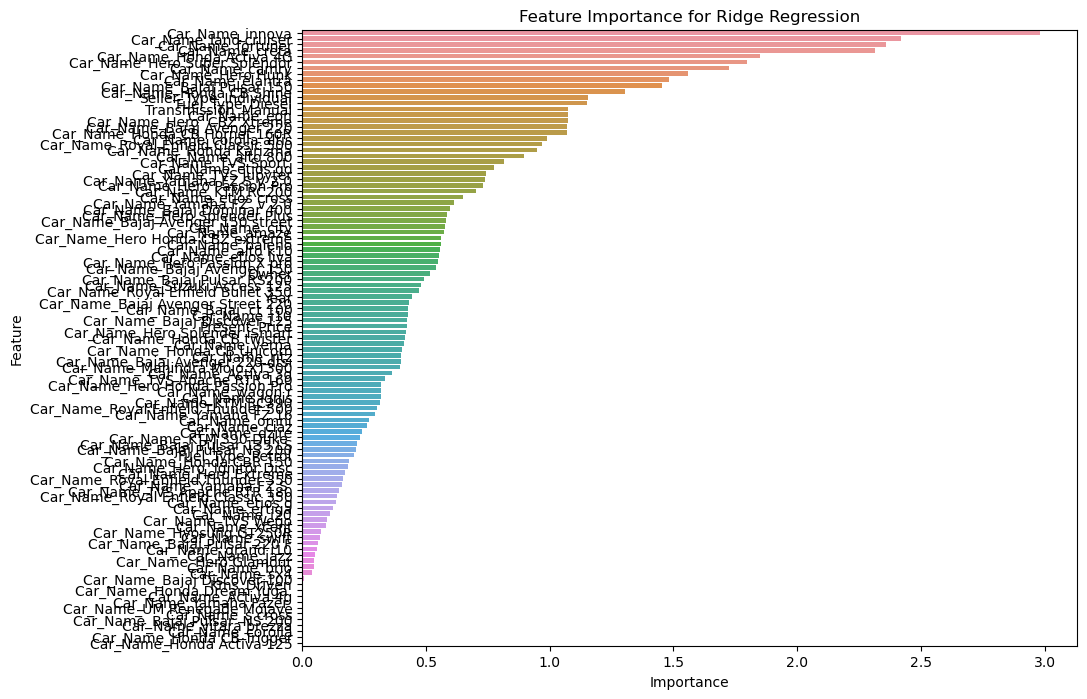

In [53]:
# Feature importance for Ridge Regression
ridge_feature_importance = np.abs(ridge_model.coef_)
ridge_feature_names = X.columns

# Create a DataFrame for better visualization
ridge_feature_importance_df = pd.DataFrame({
    'Feature': ridge_feature_names,
    'Importance': ridge_feature_importance
})

# Sort the DataFrame by importance
ridge_feature_importance_df = ridge_feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Ridge Regression:")
print(ridge_feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=ridge_feature_importance_df)
plt.title('Feature Importance for Ridge Regression')
plt.show()



Feature Importance for Lasso Regression:
                           Feature  Importance
1                    Present_Price    0.505717
0                             Year    0.283121
2                       Kms_Driven    0.000006
66               Car_Name_alto k10    0.000000
76                  Car_Name_dzire    0.000000
..                             ...         ...
32    Car_Name_Hero Super Splendor    0.000000
31   Car_Name_Hero Splender iSmart    0.000000
30     Car_Name_Hero Splender Plus    0.000000
29     Car_Name_Hero Passion X pro    0.000000
104            Transmission_Manual    0.000000

[105 rows x 2 columns]


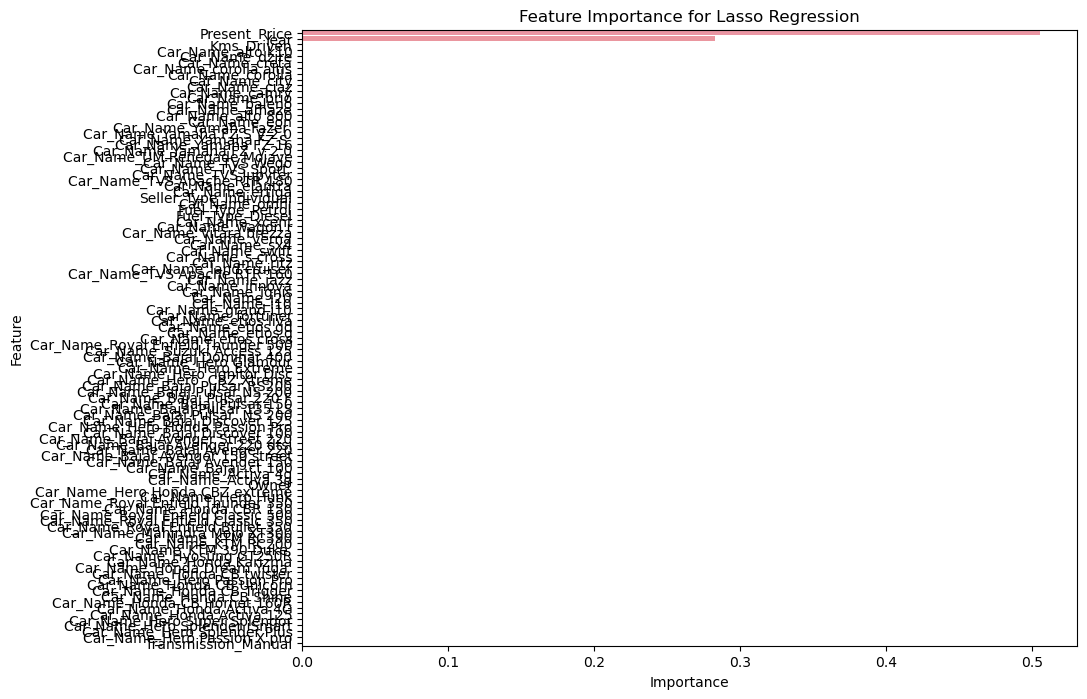

In [54]:
# Feature importance for Lasso Regression
lasso_feature_importance = np.abs(lasso_model.coef_)
lasso_feature_names = X.columns

# Create a DataFrame for better visualization
lasso_feature_importance_df = pd.DataFrame({
    'Feature': lasso_feature_names,
    'Importance': lasso_feature_importance
})

# Sort the DataFrame by importance
lasso_feature_importance_df = lasso_feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Lasso Regression:")
print(lasso_feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lasso_feature_importance_df)
plt.title('Feature Importance for Lasso Regression')
plt.show()



Feature Importance for ElasticNet Regression:
                           Feature  Importance
1                    Present_Price    0.507833
0                             Year    0.336736
2                       Kms_Driven    0.000004
66               Car_Name_alto k10    0.000000
76                  Car_Name_dzire    0.000000
..                             ...         ...
32    Car_Name_Hero Super Splendor    0.000000
31   Car_Name_Hero Splender iSmart    0.000000
30     Car_Name_Hero Splender Plus    0.000000
29     Car_Name_Hero Passion X pro    0.000000
104            Transmission_Manual    0.000000

[105 rows x 2 columns]


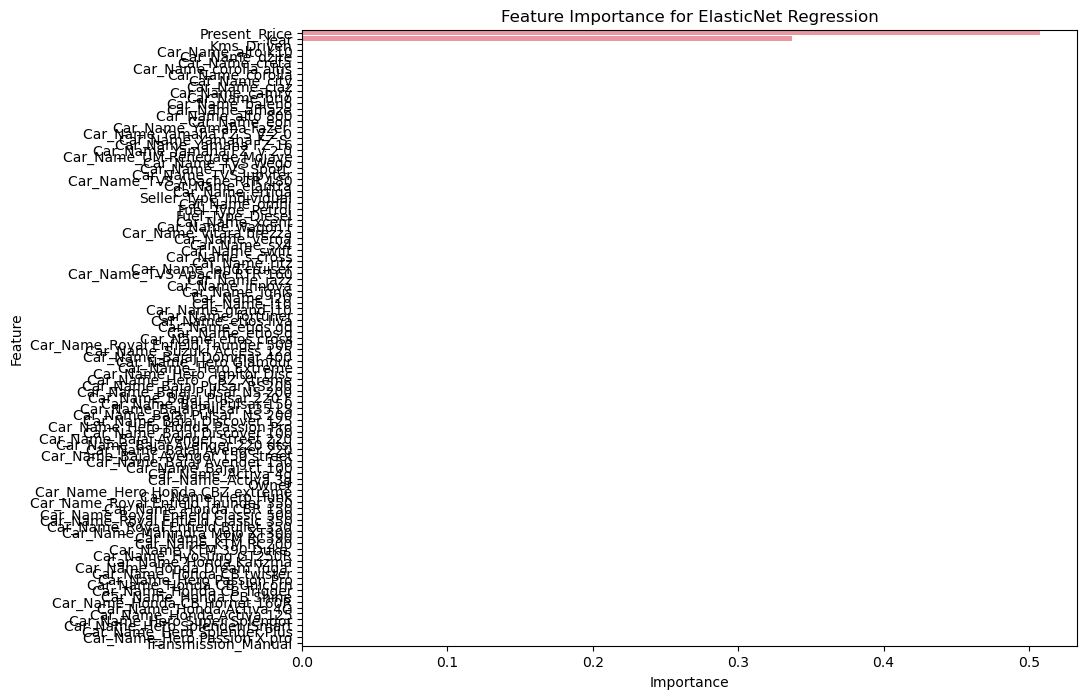

In [55]:
# Feature importance for ElasticNet Regression
elasticnet_feature_importance = np.abs(elasticnet_model.coef_)
elasticnet_feature_names = X.columns

# Create a DataFrame for better visualization
elasticnet_feature_importance_df = pd.DataFrame({
    'Feature': elasticnet_feature_names,
    'Importance': elasticnet_feature_importance
})

# Sort the DataFrame by importance
elasticnet_feature_importance_df = elasticnet_feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for ElasticNet Regression:")
print(elasticnet_feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=elasticnet_feature_importance_df)
plt.title('Feature Importance for ElasticNet Regression')
plt.show()


In [56]:
# Calculate SSE for Multiple Linear Regression
lr_sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors for Multiple Linear Regression: {lr_sse}")


Sum of Squared Errors for Multiple Linear Regression: 562.7654821120279


In [57]:
# Calculate SSE for Ridge Regression
ridge_sse = np.sum((y_test - y_pred_ridge) ** 2)
print(f"Sum of Squared Errors for Ridge Regression: {ridge_sse}")


Sum of Squared Errors for Ridge Regression: 153.90572532314684


In [58]:
# Calculate SSE for Lasso Regression
lasso_sse = np.sum((y_test - y_pred_lasso) ** 2)
print(f"Sum of Squared Errors for Lasso Regression: {lasso_sse}")


Sum of Squared Errors for Lasso Regression: 283.0698775752025


In [59]:
# Calculate SSE for ElasticNet Regression
elasticnet_sse = np.sum((y_test - y_pred_elasticnet) ** 2)
print(f"Sum of Squared Errors for ElasticNet Regression: {elasticnet_sse}")


Sum of Squared Errors for ElasticNet Regression: 268.68627882077266
